### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(21)

import warnings

warnings.simplefilter("ignore")

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Loading the dataset
# Dataset is given from https://www.kaggle.com/basilb2s/language-detection with some modification as well as another language, i.e. Persian.
# %time data = pd.read_csv("/content/drive/MyDrive/language_detection.csv")
%time data = pd.read_csv("data/language_detection.csv.bz2")


CPU times: user 29.1 ms, sys: 8.72 ms, total: 37.8 ms
Wall time: 37.6 ms


### Get familiar with the data¶

In [4]:
data.iloc[1:10830:900]

,Text,Language
1,"""Nature"" can refer to the phenomena of the phy...",English
901,"[56] Typically, the anomalous items represent ...",English
1801,ഹലോ സ്വാഗതം.,Malayalam
2701,Como os interesses das pessoas são variadíssim...,Portuguese
3601,Tout lecteur de Wikipédia est un rédacteur ou ...,French
4501,"naar een Engels sprekend land, kunt u dit voll...",Dutch
5401,tu rock you rock?,Spanish
6301,.мы все ищем быстрые способы научиться более с...,Russian
7201,Nel 2003 nascono le Wikipedia in latino e in o...,Italian
8101,ben çuvalladım ben mahvettim eğer benim yerime...,Turkish


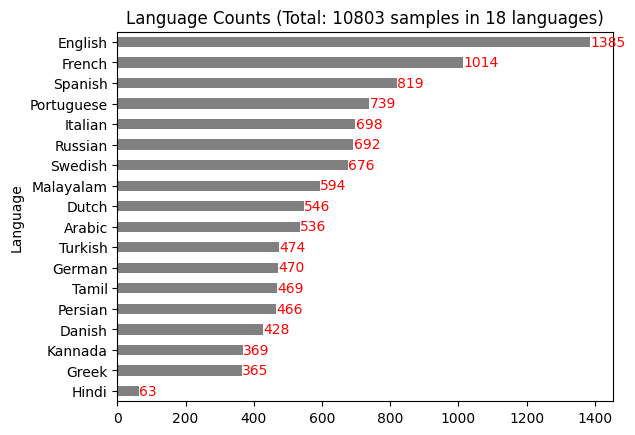

In [5]:
# value count for each language

import matplotlib.pyplot as plt
import pandas as pd

# Create the barplot
value_counts = data["Language"].value_counts()
num_languages = len(value_counts.index)
ax = value_counts.plot(kind="barh", color="gray")

# Annotate each bar with its height (count) to the right
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + 0.5, y, str(int(width)), va="center", c="red")

ax.invert_yaxis()
ax.set_title(f"Language Counts (Total: {value_counts.sum()} samples in {num_languages} languages)")

plt.show()

In [6]:
# separating the independent and dependant features

X = data["Text"]
Y = data["Language"]

In [7]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
%time y = le.fit_transform(Y)

CPU times: user 1.38 ms, sys: 19 μs, total: 1.4 ms
Wall time: 1.41 ms


### Text preprocessing


In [8]:
# Data Sanitation by removing unnecessary characters
import re

data_list = []
for text in X:
    extras = "«»\n\r\t!\"$%&/{}[]()=?\\`´*+~#-_.:,;<>|1234567890°-'۰۱۲۳۴۵۶۷۸۹،×„”“•′؟؛"
    rx = "[" + re.escape("".join(extras)) + "]"
    text = re.sub(" +", " ", re.sub(rx, " ", text)).strip()
    text = text.lower().replace(" ", "_")
    data_list.append(text)

### Train Test split

In [9]:
from sklearn.model_selection import train_test_split

%time X_train, X_test, y_train, y_test = train_test_split(data_list, y, test_size = 0.20, random_state=42)

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.78 ms


### Bag of Words
Using bigrams and trigrams

In [10]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(
    analyzer="char",
    stop_words="english",
    ngram_range=(2, 3),
    min_df=5,
)
%time x_train = cv.fit_transform(X_train).toarray()
%time x_test = cv.transform(X_test).toarray()
x_train.shape, x_test.shape

CPU times: user 751 ms, sys: 200 ms, total: 951 ms
Wall time: 960 ms
CPU times: user 190 ms, sys: 45.7 ms, total: 235 ms
Wall time: 237 ms


((8642, 22958), (2161, 22958))

### Multinomial Naive Model creation and Prediction

In [11]:
from sklearn.naive_bayes import MultinomialNB

modelMNB = MultinomialNB()
%time  modelMNB.fit(x_train, y_train)

CPU times: user 13.7 s, sys: 14.5 ms, total: 13.7 s
Wall time: 13.9 s


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [12]:
# number of times each token appears across all classes

params_dic = {"token": cv.get_feature_names_out()}
params_dic.update(
    {le.inverse_transform([i])[0]: modelMNB.feature_count_[i, :].astype(int) for i in range(num_languages)}
)
tokens = pd.DataFrame(params_dic).set_index("token")
tokens.sample(100)

,Arabic,Danish,Dutch,English,French,German,Greek,Hindi,Italian,Kannada,Malayalam,Persian,Portuguese,Russian,Spanish,Swedish,Tamil,Turkish
token,,,,,,,,,,,,,,,,,,
os—,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0
руп,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0
syn,1,5,0,2,5,0,0,0,0,0,0,0,0,0,1,5,0,0
ுந,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,0
னவ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
معل,14,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
shd,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0
hod,0,0,3,29,5,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
# number of sample in each class of trained model

params_dic = {
    "language": [le.inverse_transform([i])[0] for i in range(len(le.classes_))],
    "#samples": modelMNB.class_count_.astype(int),
}
langs = pd.DataFrame(params_dic)
langs.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
language,Arabic,Danish,Dutch,English,French,German,Greek,Hindi,Italian,Kannada,Malayalam,Persian,Portuguese,Russian,Spanish,Swedish,Tamil,Turkish
#samples,421,329,435,1110,804,377,288,52,569,312,474,374,590,558,635,540,379,395


In [14]:
# model = pickle.load(open('model.pkl', 'rb'))
pd.DataFrame(x_test, columns=cv.get_feature_names_out())
# cv.get_feature_names_out()[0], cv.get_feature_names_out()[1]

,_a,_a_,_aa,_ab,_ac,_ad,_af,_ag,_ah,_ai,...,’en,’es,’i,’id,’in,’o,’u,’un,’é,€_
0,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Prediction
y_pred = modelMNB.predict(x_test)

### Evaluating the MNB model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=np.unique(le.inverse_transform(y_test)))

In [17]:
# Accuracy
print("Accuracy is :", ac)

# classification report
print(cr)

Accuracy is : 0.982878297084683
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       115
      Danish       1.00      0.94      0.97        99
       Dutch       0.98      0.95      0.96       111
     English       0.97      1.00      0.98       275
      French       0.97      0.99      0.98       210
      German       1.00      0.96      0.98        93
       Greek       1.00      1.00      1.00        77
       Hindi       1.00      1.00      1.00        11
     Italian       0.95      0.98      0.97       129
     Kannada       1.00      1.00      1.00        57
   Malayalam       1.00      0.99      1.00       120
     Persian       1.00      1.00      1.00        92
  Portuguese       0.99      0.97      0.98       149
     Russian       1.00      1.00      1.00       134
     Spanish       0.99      0.95      0.97       184
     Swedish       0.94      0.99      0.97       136
       Tamil       1.00      1.00      1.00      

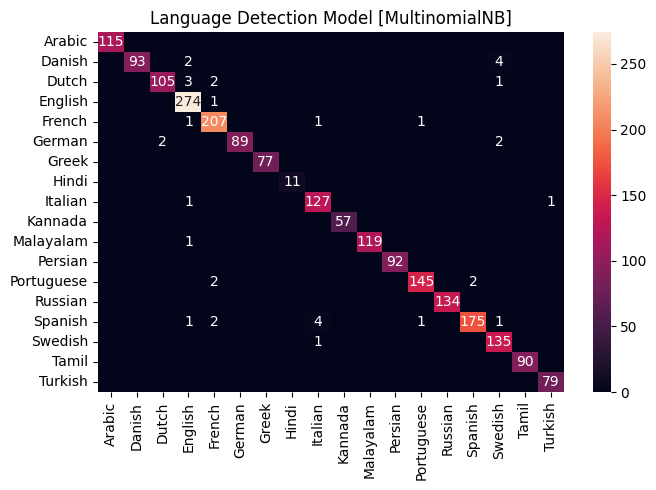

In [18]:
# visualising the confusion matrix

import seaborn as sns

labels = pd.DataFrame(cm).map(lambda v: f"{v}" if v != 0 else "")
ticks = list(map(str, np.unique(le.inverse_transform(y_test))))
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=labels, fmt="s", xticklabels=ticks, yticklabels=ticks, linewidths=0)
plt.title("Language Detection Model [MultinomialNB]")
plt.tight_layout()
plt.savefig("confusionMat.pdf", dpi=600)
plt.show()

In [19]:
s = [
    "this is test for 4th.",
    "أي تغيير  يتلاعب  بطريقة  بشكل  بسلامة يعتبر",
    "امروز هوا بارانی است.",
    "Eftersom Wikipedia bygger på tidskriftsartiklar, forskningspublikationer och böcker finns risk för rundgång ",
    "loro tre erano amiche da secoli, ma Terry ed Ellie avevano un segreto entrambe.",
    "Ja",
]
sv = cv.transform(s).toarray()
l = modelMNB.predict(sv)
le.inverse_transform(l)

array(['English', 'Arabic', 'Persian', 'Swedish', 'Italian', 'Swedish'],
      dtype=object)

### Model Saving

In [20]:
# saving both cv and nbmodel

# import pickle

# pickle.dump(cv, open("transform.pkl", "wb"))
# pickle.dump(model, open("model.pkl", "wb"))

## Neural Network model

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

torch.manual_seed(21)
torch.cuda.manual_seed_all(21)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
from collections import Counter, defaultdict
import math, time


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m:d}m {s:0.0f}s"

A two-layer Neural Neworks with Fully Connected layers and ReLU as its nonlinearity, this network outperforms our baseline -- MultiNaive Bayes model

In [23]:
class Net(nn.Module):
    def __init__(self, input_size, output_size, dropout=0.6):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, output_size * 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(output_size * 4, output_size),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.linear_relu_stack(x)


input_size = len(cv.vocabulary_)
output_size = len(le.classes_)

summary(Net(input_size, output_size), input_size=(input_size,), batch_size=-1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 72]       1,653,048
              ReLU-2                   [-1, 72]               0
           Dropout-3                   [-1, 72]               0
            Linear-4                   [-1, 18]           1,314
              ReLU-5                   [-1, 18]               0
Total params: 1,654,362
Trainable params: 1,654,362
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/backward pass size (MB): 0.00
Params size (MB): 6.31
Estimated Total Size (MB): 6.40
----------------------------------------------------------------


In [24]:
def fwd_pass(X, y, net, loss_function, optimizer, train=False):
    if train:
        net.train()
        outputs = net(X)
        loss = loss_function(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    else:
        net.eval()
        with torch.no_grad():
            outputs = net(X)
            loss = loss_function(outputs, y)
    with torch.no_grad():
        preds = outputs.argmax(dim=1)
        acc = accuracy_score(y.cpu(), preds.cpu())
        f1 = f1_score(y.cpu(), preds.cpu(), average="weighted")

    return loss.item(), acc, f1


X_test = torch.tensor(x_test, dtype=torch.float).to(device)
Y_test = torch.tensor(y_test, dtype=torch.long).to(device)

lr = 0.01
epochs = 20
batch = 512

input_size = len(cv.vocabulary_)
output_size = len(le.classes_)
modelNN = Net(input_size, output_size).to(device)
bestModel = modelNN

optimizer = Adam(modelNN.parameters(), lr=lr)
lr_scheduler = StepLR(optimizer, step_size=10, gamma=0.86)
criterion = nn.CrossEntropyLoss()

print_every = epochs // 10
train_losses, val_losses = [], []
accuracies, val_accuracies = [], []
f1s, val_f1s = [], []

start = time.time()
print(f"Training Starts ...")
n = batch * int(len(x_train) / batch)

best_loss = float("inf")

for epoch in range(epochs + 1):
    train_loss, test_loss = 0, 0
    for i in range(int(len(x_train) / batch)):
        print(f"\rCycle{i:3} from {int(len(x_train) / batch):3} in epoch {epoch:3}", end="")
        loss, acc, f1 = fwd_pass(
            torch.tensor(x_train[(i) * batch : (i + 1) * batch], dtype=torch.float).view(batch, -1).to(device),  # X
            torch.tensor(y_train[(i) * batch : (i + 1) * batch], dtype=torch.long).to(device),  # Y
            modelNN,
            criterion,
            optimizer,
            True,
        )
        train_loss += loss
    train_loss /= int(len(x_train) / batch)  # average over batches

    train_losses.append(train_loss)
    accuracies.append(acc)
    f1s.append(f1)

    val_loss, val_acc, val_f1 = fwd_pass(X_test, Y_test, modelNN, criterion, optimizer, False)
    val_accuracies.append(val_acc)
    val_losses.append(val_loss)
    val_f1s.append(val_f1)

    if best_loss > val_loss:
        best_loss = val_loss
        best_model = modelNN
    lr_scheduler.step()

    if epoch <= 3 or epoch % print_every == 0:
        print(
            f"\r====> Epoch [{epoch:3}] Train/Validation loss: {train_loss:.9f}/{val_loss:.9f} :: Accuracy: {acc * 100:7.5f}/{val_acc * 100:7.5f}, F1 Scores: {f1:.5f}/{val_f1:.5f}"
        )


print(f"Training ends at {timeSince(start)}")

Training Starts ...
====> Epoch [  0] Train/Validation loss: 0.899764020/0.171483889 :: Accuracy: 94.14062/98.14901, F1 Scores: 0.94158/0.98146
====> Epoch [  1] Train/Validation loss: 0.165876990/0.097390711 :: Accuracy: 98.04688/98.33410, F1 Scores: 0.98044/0.98336
====> Epoch [  2] Train/Validation loss: 0.096665964/0.079219267 :: Accuracy: 98.04688/98.42665, F1 Scores: 0.98054/0.98428
====> Epoch [  3] Train/Validation loss: 0.063564611/0.074872240 :: Accuracy: 98.04688/98.38038, F1 Scores: 0.98051/0.98380
====> Epoch [  4] Train/Validation loss: 0.053247404/0.075467095 :: Accuracy: 99.41406/98.28783, F1 Scores: 0.99413/0.98288
====> Epoch [  6] Train/Validation loss: 0.040447384/0.071040012 :: Accuracy: 99.21875/98.51920, F1 Scores: 0.99220/0.98519
====> Epoch [  8] Train/Validation loss: 0.041942178/0.073260956 :: Accuracy: 99.21875/98.19528, F1 Scores: 0.99228/0.98197
====> Epoch [ 10] Train/Validation loss: 0.027118531/0.072141081 :: Accuracy: 99.60938/98.28783, F1 Scores: 0.99

Using matplotlib backend: module://matplotlib_inline.backend_inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


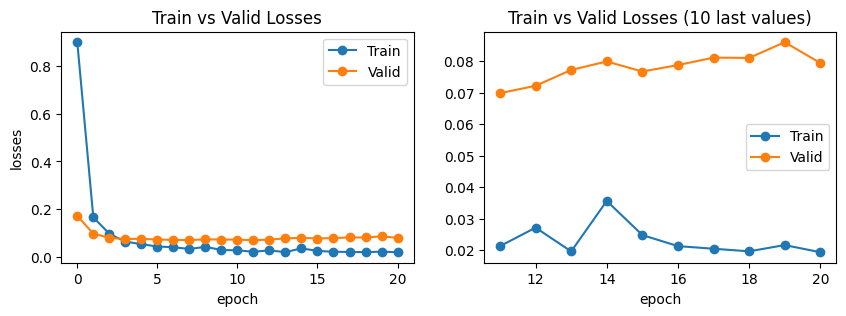

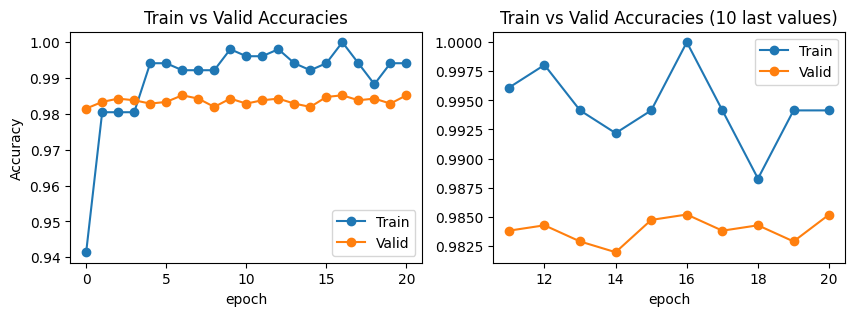

In [25]:
%pylab
%matplotlib inline


def res_plot(plotdata, xlabel="epoch", ylabel="losses", legend=["Train", "Valid"], title=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.set_ylabel(ylabel)
    for ax in (ax1, ax2):
        n = 10 if ax == ax2 else 0
        x = range(epochs - n + 1, epochs + 1) if ax == ax2 else range(epochs + 1)
        title = f"{title} ({n} last values)" if ax == ax2 else title
        ax.set_xlabel(xlabel)
        ax.set_title(title)
        ax.plot(x, plotdata[0][-n:], "-o", label=legend[0])
        ax.plot(x, plotdata[1][-n:], "-o", label=legend[1])
        ax.legend()
    plt.show()


res_plot([(train_losses), (val_losses)], title="Train vs Valid Losses")
res_plot([accuracies, val_accuracies], ylabel="Accuracy", title="Train vs Valid Accuracies")

Accuracy is 0.985192040721888
f1-score is 0.9851962666367491


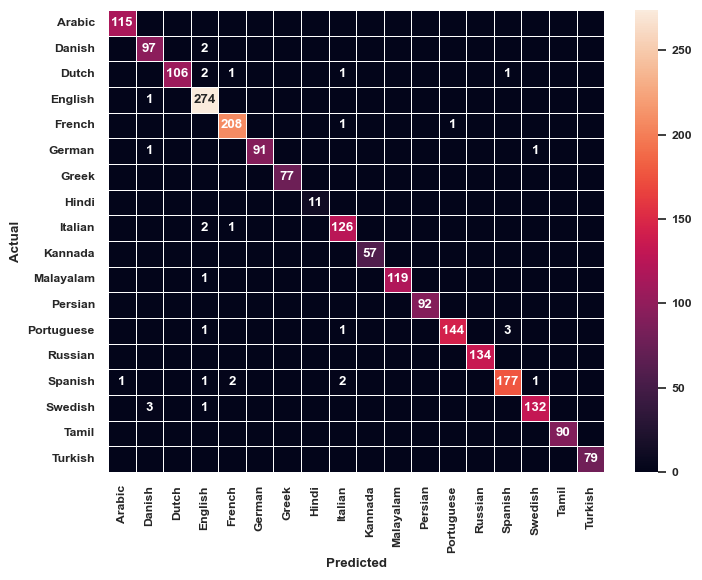

In [26]:
best_model.eval()
out = best_model(X_test).to(device)
out = out.argmax(dim=1)
accuracy = accuracy_score(y_test, out.cpu())
f1score = f1_score(Y_test.cpu(), out.cpu(), average="weighted")
print(f"Accuracy is {accuracy}\nf1-score is {f1score}")

conf_matrix = confusion_matrix(y_pred=out.cpu(), y_true=y_test)
ticks = [str(le.inverse_transform([j])[0]) for j in range(len(le.classes_))]
df_cm = pd.DataFrame(conf_matrix, columns=ticks, index=ticks)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
labels = pd.DataFrame(df_cm).applymap(lambda v: f"{v}" if v != 0 else "")
sns.heatmap(df_cm, annot=labels, fmt="s", linewidths=0.5)
plt.show()

# Evaluating the accuracy of Neural Network model on unseen data

In [27]:
# Dataset is given from https://ufal.mff.cuni.cz/~kocmanek/2016/docs/lanidenn_testset.txt
# %time ldata = pd.read_csv("/content/drive/MyDrive/lanidenn_testset.csv", delimiter="^", header=None, names=['Language', 'Text'])
%time ldata = pd.read_csv("data/lanidenn_testset.csv.bz2", delimiter="^", header=None, names=['Language', 'Text'])

CPU times: user 51.1 ms, sys: 4.99 ms, total: 56.1 ms
Wall time: 55 ms


In [28]:
ldata.head(10)

,Language,Text
0,hif,"Ii sandhi 1919 me, bina German sarkar ke part..."
1,mkd,Наум Охридски“ на брегот на Охридското Езеро ...
2,fry,De 23-jierrige Chris de Wagt trochrûn by SK C...
3,lus,"Mi 1500 chuang exam paper, ni hnih khat leka ..."
4,ast,El Burj Khalifa ye actualmente el rascacielos...
5,pan,ਮੈਨੂੰ ਉਸ ਦੀ ਖ਼ੁਸ਼ਬੂ ਪਸੰਦ ਹੈ।
6,cos,La Grecia entra in guerra è si schjera cù l'I...
7,scn,Doppu aviri pirdutu la battagghia ligali cu J...
8,zho,许多普通农民不敢对他们的领主反抗，因为他们在许多方面依靠这些领主。尤其农村的上层阶层呼吁改...
9,nds,"He weet nich, ’keen ik bün."


In [29]:
from src.constants import ISO639_LANGUAGE_NAMES

RX = ldata.loc[ldata["Language"].isin(ISO639_LANGUAGE_NAMES.keys())]["Text"]
RY = ldata.loc[ldata["Language"].isin(ISO639_LANGUAGE_NAMES.keys())]["Language"]

rx = cv.transform([i for i in RX]).toarray()
yhatnb = modelMNB.predict(rx)

rx = torch.tensor(rx, dtype=torch.float).to(device)
ry = [le.transform([ISO639_LANGUAGE_NAMES[i]]) for i in RY]

with torch.no_grad():
    yhatnn = best_model(rx)
    yhatnn = yhatnn.argmax(dim=1)

accnn = accuracy_score(ry, yhatnn.cpu())
accnb = accuracy_score(ry, yhatnb)

print(
    f"Accuracy of Trained Neural Network is  {accnn * 100}\
        \n\rAccuracy of Multinomial Naive Bayes is {accnb * 100}"
)

Accuracy of Trained Neural Network is  96.25        
Accuracy of Multinomial Naive Bayes is 96.5
